#                              Proyecto Registro de Reparaciones de Montacargas

El presente proyecto responde a la necesidad de resgistrar y analizar el proceso de reparación de equipos en las tres
Terminales de la compañía, así como conocer la duración y costo de las mismas para la toma de decisiones.

<img src="montacargas3.jpg">

In [6]:
import pandas

file = pd.read_excel('Mantenimiento.xlsx')
df = pd.DataFrame(file)
df
df.head()

ID Solicitante       Código Ubicación    Marca      Modelo  \
0  R00001     YVARGAS  MON-ALM-062   Heredia  Raymond  EASIDR30TT   
1  R00002     YVARGAS  MON-ALS-078   Heredia  Komatsu    FG25T-17   
2  R00003     YVARGAS  MON-ALM-062   Heredia  Raymond  EASIDR30TT   
3  R00004    AMORALES  MON-ALM-062   Heredia  Raymond  EASIDR30TT   
4  R00005       DVEGA  MON-ALS-041   Heredia  Komatsu    FG30T-16   

           Serie  Año Fabricación  Hora_Horimetro Tipo_Fallo  \
0  EZ-B-04-31217             2004             235      Luces   
1         345721             2006             235    Llantas   
2  EZ-B-04-31217             2004             324      Motor   
3  EZ-B-04-31217             2004             377    Batería   
4         729960             2007             235   Arranque   

          ...          Fecha_del_reporte Hora_del_reporte  \
0         ...                 2016-07-01         13:45:00   
1         ...                 2016-07-16         10:30:00   
2         ...                 2016-07-21         10:24:00   
3         ...                 2016-08-08         14:05:00   
4         ...                 2016-08-21         14:50:00   

  Fecha_visita_tecnico Hora_visita_tecnico Fecha_del_aprobacion  \
0           2016-07-02            15:45:00           2016-07-04   
1           2016-07-18            13:00:00           2016-07-22   
2           2016-07-24            12:37:00           2016-07-27   
3           2016-08-09            16:10:00           2016-08-11   
4           2016-08-24            15:25:00           2016-08-28   

  Hora_aprobacion Fecha_incio_reparacion Hora_inicio_reparacion  \
0        16:00:00             2016-07-08               16:10:00   
1        13:36:00             2016-07-26               13:36:00   
2        13:15:00             2016-07-30               13:43:00   
3        16:30:00             2016-08-13               16:35:00   
4        15:36:00             2016-08-29               15:36:00   

  Fecha_fin_reparacion Hora_fin_reparacion  
0           2016-07-12            16:30:00  
1           2016-07-27            13:57:00  
2           2016-08-01            13:57:00  
3           2016-08-14            16:40:00  
4           2016-09-02            15:41:00  

[5 rows x 21 columns]

Eventos reportados por mes

In [7]:
sucesos=df.set_index('Fecha_del_reporte').resample('M')["Código"].count()
sucesos

Fecha_del_reporte
2016-07-31    3
2016-08-31    3
2016-09-30    2
2016-10-31    3
2016-11-30    4
2016-12-31    7
2017-01-31    3
2017-02-28    2
2017-03-31    4
2017-04-30    3
2017-05-31    5
2017-06-30    2
2017-07-31    3
2017-08-31    3
2017-09-30    2
2017-10-31    2
2017-11-30    3
2017-12-31    4
2018-01-31    3
2018-02-28    4
2018-03-31    4
2018-04-30    1
2018-05-31    4
Freq: M, Name: Código, dtype: int64

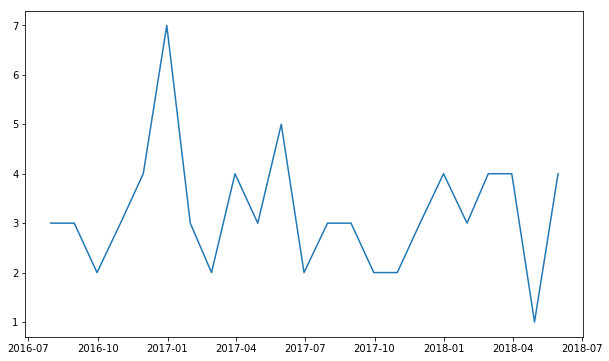

In [33]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

import matplotlib.pyplot as plt
import numpy as np

plt.plot(sucesos)


In [8]:
reportes= df.set_index('Fecha_del_reporte').groupby('Código')["Tipo_Fallo"].resample("A").count()
reportes

Código       Fecha_del_reporte
MON-ALM-062  2016-12-31           5
             2017-12-31           3
             2018-12-31           4
MON-ALM-063  2016-12-31           1
MON-ALM-070  2017-12-31           3
             2018-12-31           3
MON-ALM-080  2017-12-31           4
             2018-12-31           1
MON-ALS-041  2016-12-31           1
             2017-12-31           2
             2018-12-31           2
MON-ALS-056  2016-12-31           1
             2017-12-31           3
             2018-12-31           1
MON-ALS-064  2016-12-31           2
             2017-12-31           4
MON-ALS-065  2017-12-31           1
             2018-12-31           1
MON-ALS-066  2016-12-31           2
             2017-12-31           2
             2018-12-31           2
MON-ALS-067  2016-12-31           4
             2017-12-31           6
MON-ALS-068  2016-12-31           2
             2017-12-31           4
             2018-12-31           1
MON-ALS-077  2016-12-31          

In [9]:
Costo_reparaciones_equipo= df.groupby(('Tipo_Fallo')).sum()
Costo_reparaciones_equipo

Año Fabricación  Hora_Horimetro  Costo_Reparacion
Tipo_Fallo                                                           
Arranque                      12043            2083            296276
Batería                       14048            2861            298878
Cables de clutch              14033            2529            536543
Caja                          14036            3027            391746
Codigo en pantalla             6025            1175            211830
Daños en la torre             14032            3623            281208
Frenos                        18056            4515            395762
Fujas de aceite                6016             930            161959
Llantas                       16050            3714            568027
Luces                         14033            3181            543687
Motor                         20055            3480            592058

In [10]:
resumen_anual=df.groupby(['Código', pd.Grouper(key='Fecha_del_reporte', freq='A')])['Costo_Reparacion'].sum().loc['MON-ALM-062']
resumen_anual

Fecha_del_reporte
2016-12-31    330857
2017-12-31    162212
2018-12-31    254579
Freq: A-DEC, Name: Costo_Reparacion, dtype: int64

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(resumen_anual)

# Días de respuesta

In [12]:
Días_respuesta_a_solicitudes = df['Fecha_visita_tecnico'].sub(df['Fecha_del_reporte'], axis=0).mean()
print("En promedio se tardan ",Días_respuesta_a_solicitudes," para que un técnico atienda una solicitud")

En promedio se tardan  2 days 08:45:24.324324  para que un técnico atienda una solicitud


# Días de reparación

In [13]:
Días_de_reparación = df['Fecha_fin_reparacion'].sub(df['Fecha_incio_reparacion'], axis=0).mean()
print("En promedio las reparaciones duran ",Días_de_reparación)

En promedio las reparaciones duran  2 days 08:45:24.324324


In [ ]:
df['Días_de_reparación']=Días_de_reparación
Días_en_reparacion_por_tipo_de_fallo= df.groupby(('Tipo_Fallo')).Días_de_reparación.sum()
Días_en_reparacion_por_tipo_de_fallo.sort_index(axis=0, ascending=False)

# Duración de las reparaciones

In [15]:
df['Hora_inicio_reparacion'].apply(lambda x:type (str(x)))
df['Hora_fin_reparacion'].apply(lambda x:type (str(x)))

df['Hora_inicio_reparacion']=df['Hora_inicio_reparacion'].apply(lambda x:pandas.Timedelta(str(x)))
df['Hora_fin_reparacion']=df['Hora_fin_reparacion'].apply(lambda x:pandas.Timedelta(str(x)))

X=df['Hora_inicio_reparacion']+df['Fecha_incio_reparacion']
Y=df['Hora_fin_reparacion']+df['Fecha_fin_reparacion']

Z= Y-X
df['Duracion_reparacion']=Z
print("La duranción promedio de la reparación es de ",Z.mean())

La duranción promedio de la reparación es de  2 days 08:53:48.648648


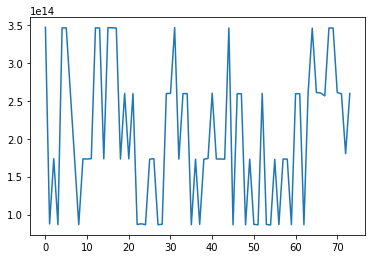

In [16]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(Z)

In [17]:
Días_en_reparacion_por_tipo_de_fallo.max()

Timedelta('23 days 15:34:03.243243')

# Costo de Reparación por tipo de fallo y equipo

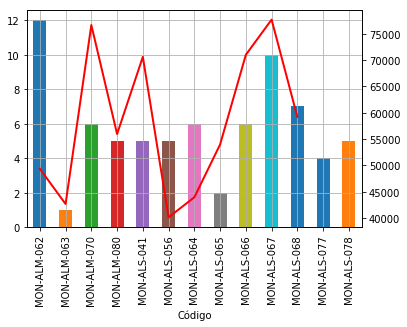

In [18]:
frecuencia =  pd.DataFrame((df['Costo_Reparacion']).groupby(df['Tipo_Fallo']).mean())
exposicion = pd.DataFrame((df["Costo_Reparacion"]).groupby(df['Código']).count())
import matplotlib.pyplot as plt

fig = plt.figure()
ax = exposicion['Costo_Reparacion'].plot(kind='bar',grid=True)
ax2 = ax.twinx()
ax2.plot(frecuencia['Costo_Reparacion'].values, linestyle='-', linewidth=2.0,color='red')
plt.show();

# Costo reparacion por equipo y horas de trabajo

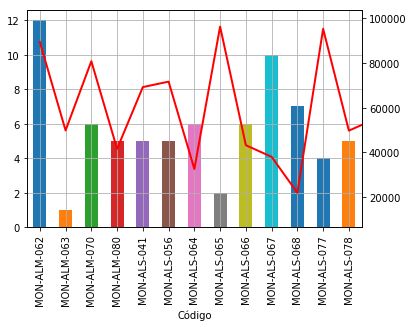

In [19]:
frecuencia =  pd.DataFrame((df['Costo_Reparacion']).groupby(df['Hora_Horimetro']).max())
exposicion = pd.DataFrame((df["Costo_Reparacion"]).groupby(df['Código']).count())
import matplotlib.pyplot as plt

fig = plt.figure()
ax = exposicion['Costo_Reparacion'].plot(kind='bar',grid=True)
ax2 = ax.twinx()
ax2.plot(frecuencia['Costo_Reparacion'].values, linestyle='-', linewidth=2.0,color='red')
plt.show();

In [67]:
Costo_global= df.set_index('Fecha_del_reporte').groupby('Código')["Costo_Reparacion"].resample("A").sum()
Costo_global

Código       Fecha_del_reporte
MON-ALM-062  2016-12-31           330857
             2017-12-31           162212
             2018-12-31           254579
MON-ALM-063  2016-12-31            65809
MON-ALM-070  2017-12-31           220907
             2018-12-31           188340
MON-ALM-080  2017-12-31           221092
             2018-12-31            73581
MON-ALS-041  2016-12-31            85193
             2017-12-31           193040
                                   ...  
MON-ALS-067  2016-12-31           134478
             2017-12-31           271264
MON-ALS-068  2016-12-31           127482
             2017-12-31           248087
             2018-12-31            88425
MON-ALS-077  2016-12-31           147697
             2017-12-31           187612
MON-ALS-078  2016-12-31            91759
             2017-12-31           117633
             2018-12-31            41542
Name: Costo_Reparacion, Length: 31, dtype: int64

In [20]:
Costo_global= df.set_index('Fecha_del_reporte').groupby('Código')["Costo_Reparacion"].sum()
Costo_global

Código
MON-ALM-062    747648
MON-ALM-063     65809
MON-ALM-070    409247
MON-ALM-080    294673
MON-ALS-041    347185
MON-ALS-056    145273
MON-ALS-064    331957
MON-ALS-065     71176
MON-ALS-066    409027
MON-ALS-067    405742
MON-ALS-068    463994
MON-ALS-077    335309
MON-ALS-078    250934
Name: Costo_Reparacion, dtype: int64

# Gráfico: Costo de reparación por equipo

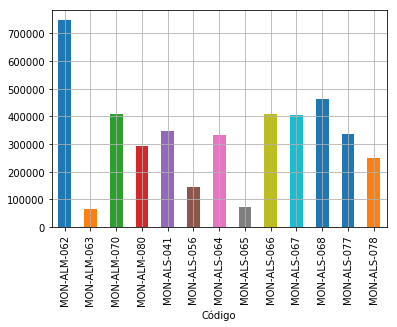

In [21]:

exposicion = pd.DataFrame((df["Costo_Reparacion"]).groupby(df['Código']).sum())
import matplotlib.pyplot as plt

fig = plt.figure()
ax = exposicion['Costo_Reparacion'].plot(kind='bar',grid=True)

plt.show();

# Gráfico: Costo de reparación por equipo vs horas de trabajo por equipo

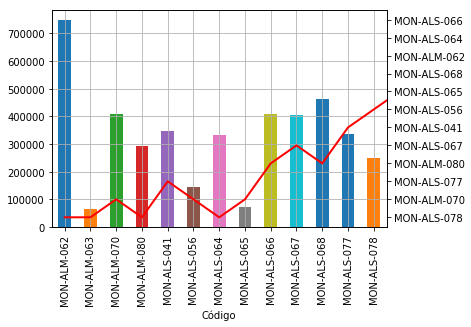

In [22]:
frecuencia =  pd.DataFrame((df["Código"]).groupby(df['Hora_Horimetro']).max())
exposicion = pd.DataFrame((df["Costo_Reparacion"]).groupby(df['Código']).sum())
import matplotlib.pyplot as plt

fig = plt.figure()
ax = exposicion['Costo_Reparacion'].plot(kind='bar',grid=True)
ax2 = ax.twinx()
ax2.plot(frecuencia["Código"].values, linestyle='-', linewidth=2.0,color='red')
plt.show();

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
Costo_global.to_excel("Reporte.xlsx")
fig.savefig('costos_reparacion.png')